In [1]:
import pandas as pd
import numpy as np


In [2]:
full2011 = pd.read_csv('atp_matches_2011.csv')
full2011

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2011-339,Brisbane,Hard,32,A,20110102,1,104417,1.0,NaN,...,27.0,16.0,12.0,9.0,1.0,4.0,5.0,5580.0,173.0,309.0
1,2011-339,Brisbane,Hard,32,A,20110102,2,103582,NaN,NaN,...,59.0,42.0,20.0,14.0,3.0,5.0,58.0,835.0,75.0,643.0
2,2011-339,Brisbane,Hard,32,A,20110102,3,105051,NaN,Q,...,58.0,42.0,6.0,14.0,4.0,8.0,196.0,263.0,204.0,243.0
3,2011-339,Brisbane,Hard,32,A,20110102,4,104797,8.0,NaN,...,43.0,31.0,17.0,11.0,2.0,3.0,40.0,1031.0,43.0,975.0
4,2011-339,Brisbane,Hard,32,A,20110102,5,103888,4.0,NaN,...,37.0,24.0,11.0,8.0,3.0,6.0,16.0,1991.0,83.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,2011-605,Tour Finals,Hard,16,F,20111120,14,104607,NaN,NaN,...,36.0,22.0,26.0,14.0,3.0,8.0,7.0,3300.0,5.0,4480.0
3011,2011-605,Tour Finals,Hard,16,F,20111120,15,104607,NaN,NaN,...,37.0,32.0,27.0,14.0,4.0,5.0,7.0,3300.0,9.0,2395.0
3012,2011-D044,Davis Cup WG F: ESP vs ARG,Clay,4,D,20111202,1,104745,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9575.0,26.0,1335.0
3013,2011-D044,Davis Cup WG F: ESP vs ARG,Clay,4,D,20111202,2,103970,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4880.0,11.0,2315.0


In [32]:
def cleanthisshit(df):   #i prefer cheeky names
    features = df[['surface', 'tourney_level','best_of', 
                     'winner_hand', 'winner_ht', 'winner_age', 'winner_rank', 
                     'loser_hand', 'loser_ht','loser_age', 'loser_rank']]   
    
    courts = pd.get_dummies(features['surface']) #split surfaces into binary
    carpets = courts.iloc[:,0]
    clays = courts.iloc[:,1]
    grasses = courts.iloc[:,2]
    hards = courts.iloc[:,3]   # each surface is now its own variable for insertion
    
    tourneys = pd.get_dummies(features['tourney_level']) #split tourney ranks into binary
    A = tourneys.iloc[:,0]
    D = tourneys.iloc[:,1]
    F = tourneys.iloc[:,2]
    G = tourneys.iloc[:,3]
    M = tourneys.iloc[:,4]  # each tournament level now its own variable for insertion
    
    whands = pd.get_dummies(features['winner_hand'])
    L1 = whands.iloc[:,0]
    R1 = whands.iloc[:,1]
    U1 = whands.iloc[:,2] #you get the point, right? RiGHt?!


    lhands = pd.get_dummies(features['loser_hand'])
    L2 = lhands.iloc[:,0]
    R2 = lhands.iloc[:,1]
    U2 = lhands.iloc[:,2]

    
    features.drop(['surface', 'tourney_level', 'winner_hand', 'loser_hand'], axis=1, inplace=True)  #get rid of those dang letters
    
    features.insert(0, 'carpet', carpets)
    features.insert(1, 'clay', clays)
    features.insert(2, 'grass', grasses)
    features.insert(3, 'hard', hards)
    
    features.insert(4, 'A', A)
    features.insert(5, 'D', D)
    features.insert(6, 'F', F)
    features.insert(7, 'G', G)
    features.insert(8, 'M', M)
    
    features.insert(13, 'L1', L1)
    features.insert(14, 'R1', R1)
    features.insert(15, 'U1', U1)
    
    features.insert(19,'L2',L2)
    features.insert(20,'R2',R2)
    features.insert(21,'U2',U2)
    
    return features





In [3]:
full2011.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [6]:
trim2011 = full2011[['surface', 'tourney_level','best_of', 
                     'winner_hand', 'winner_ht', 'winner_age', 'winner_rank', 
                     'loser_hand', 'loser_ht','loser_age', 'loser_rank']]

In [7]:
trim2011

,surface,tourney_level,best_of,winner_hand,winner_ht,winner_age,winner_rank,loser_hand,loser_ht,loser_age,loser_rank
0,Hard,A,3,R,193.0,26.387406,5.0,R,183.0,18.658453,173.0
1,Hard,A,3,L,193.0,30.507871,58.0,R,175.0,25.749487,75.0
2,Hard,A,3,R,188.0,23.104723,196.0,R,183.0,21.555099,204.0
3,Hard,A,3,R,188.0,24.323066,40.0,R,193.0,22.288843,43.0
4,Hard,A,3,R,188.0,29.067762,16.0,L,183.0,22.513347,83.0
...,...,...,...,...,...,...,...,...,...,...,...
3010,Hard,F,3,R,196.0,26.176591,7.0,R,175.0,29.637235,5.0
3011,Hard,F,3,R,196.0,26.176591,7.0,R,180.0,27.414100,9.0
3012,Clay,D,5,L,185.0,25.486653,2.0,R,185.0,27.665982,26.0
3013,Clay,D,5,R,175.0,29.656400,5.0,R,198.0,23.178645,11.0


In [12]:
courts = pd.get_dummies(trim2011.surface)
courts

,Carpet,Clay,Grass,Hard
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
3010,0,0,0,1
3011,0,0,0,1
3012,0,1,0,0
3013,0,1,0,0


In [15]:
carpets = courts.iloc[:,0]
clays = courts.iloc[:,1]
grasses = courts.iloc[:,2]
hards = courts.iloc[:,3]

In [33]:
men2011 = cleanthisshit(full2011)

/Users/MBest/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
men2011

,carpet,clay,grass,hard,A,D,F,G,M,best_of,...,winner_rank,L1,R1,U1,loser_ht,loser_age,loser_rank,L2,R2,U2
0,0,0,0,1,1,0,0,0,0,3,...,5.0,0,1,0,183.0,18.658453,173.0,0,1,0
1,0,0,0,1,1,0,0,0,0,3,...,58.0,1,0,0,175.0,25.749487,75.0,0,1,0
2,0,0,0,1,1,0,0,0,0,3,...,196.0,0,1,0,183.0,21.555099,204.0,0,1,0
3,0,0,0,1,1,0,0,0,0,3,...,40.0,0,1,0,193.0,22.288843,43.0,0,1,0
4,0,0,0,1,1,0,0,0,0,3,...,16.0,0,1,0,183.0,22.513347,83.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,0,0,0,1,0,0,1,0,0,3,...,7.0,0,1,0,175.0,29.637235,5.0,0,1,0
3011,0,0,0,1,0,0,1,0,0,3,...,7.0,0,1,0,180.0,27.414100,9.0,0,1,0
3012,0,1,0,0,0,1,0,0,0,5,...,2.0,1,0,0,185.0,27.665982,26.0,0,1,0
3013,0,1,0,0,0,1,0,0,0,5,...,5.0,0,1,0,198.0,23.178645,11.0,0,1,0


In [372]:
from numpy import random
reversedorder = [
    'carpet', 'clay', 'grass', 'hard',
    'A', 'D', 'F', 'G', 'M', 'best_of', 
    'loser_ht', 'loser_age','loser_rank','L2', 'R2', 'U2', 
    'winner_ht', 'winner_age','winner_rank', 'L1', 'R1', 'U1']

def flipornotnewframe(row):
    newframe = []
    flip = np.random.choice([0,1], p=[0.5,0.5])
    
    if flip == 0: #player info does not shuffle, player A is winner (default)
        row['result'] = 0
        newframe.append(row)
        
    else:   #winner info goes into player B spot
        row = row.reindex(reversedorder)
        row['result'] = 1
        newframe.append(row)
        
    #rename here
    #holder = dict(zip(row.index[-len(keys):], keys))
    #return row.rename(matchatt.update(holder))
    return pd.DataFrame(newframe)

ready2011 = men2011.apply(lambda x: flipornotnewframe(x), axis=1)

In [40]:
data2012 = pd.read_csv('atp_matches_2012.csv')

In [43]:
cleaned2012 = cleanthisshit(data2012)

/Users/MBest/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
data2013 = pd.read_csv('atp_matches_2013.csv')

In [58]:
cleaned2013 = updatecleanthisshit(data2013)

/Users/MBest/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
cleaned2013

,clay,grass,hard,A,D,F,G,M,best_of,winner_ht,...,winner_rank,L1,R1,U1,loser_ht,loser_age,loser_rank,L2,R2,U2
0,0,0,1,1,0,0,0,0,3,183.0,...,199.0,0,1,0,180.0,24.621492,79.0,0,1,0
1,0,0,1,1,0,0,0,0,3,180.0,...,83.0,0,1,0,180.0,31.252567,162.0,0,1,0
2,0,0,1,1,0,0,0,0,3,188.0,...,43.0,0,1,0,190.0,23.474333,30.0,1,0,0
3,0,0,1,1,0,0,0,0,3,185.0,...,41.0,1,0,0,185.0,31.030801,35.0,0,1,0
4,0,0,1,1,0,0,0,0,3,180.0,...,114.0,0,1,0,183.0,20.651608,69.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,0,0,1,0,0,1,0,0,3,188.0,...,2.0,0,1,0,185.0,27.422313,1.0,1,0,0
2940,0,0,1,0,1,0,0,0,5,188.0,...,2.0,0,1,0,185.0,34.956879,44.0,0,1,0
2941,0,0,1,0,1,0,0,0,5,196.0,...,7.0,0,1,0,180.0,23.367556,117.0,0,1,0
2942,0,0,1,0,1,0,0,0,5,188.0,...,2.0,0,1,0,196.0,28.150582,7.0,0,1,0


In [52]:
courts = pd.get_dummies(features2013.surface)

In [54]:
courts  # no more carpets?

,Clay,Grass,Hard
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
2939,0,0,1
2940,0,0,1
2941,0,0,1
2942,0,0,1


In [57]:
def updatecleanthisshit(df):   #i prefer cheeky names
    features = df[['surface', 'tourney_level','best_of', 
                     'winner_hand', 'winner_ht', 'winner_age', 'winner_rank', 
                     'loser_hand', 'loser_ht','loser_age', 'loser_rank']]   
    
    courts = pd.get_dummies(features['surface']) #split surfaces into binary
    clays = courts.iloc[:,0]
    grasses = courts.iloc[:,1]
    hards = courts.iloc[:,2]   # each surface is now its own variable for insertion
    
    tourneys = pd.get_dummies(features['tourney_level']) #split tourney ranks into binary
    A = tourneys.iloc[:,0]
    D = tourneys.iloc[:,1]
    F = tourneys.iloc[:,2]
    G = tourneys.iloc[:,3]
    M = tourneys.iloc[:,4]  # each tournament level now its own variable for insertion
    
    whands = pd.get_dummies(features['winner_hand'])
    L1 = whands.iloc[:,0]
    R1 = whands.iloc[:,1]
    U1 = whands.iloc[:,2] #you get the point


    lhands = pd.get_dummies(features['loser_hand'])
    L2 = lhands.iloc[:,0]
    R2 = lhands.iloc[:,1]
    U2 = lhands.iloc[:,2]

    
    features.drop(['surface', 'tourney_level', 'winner_hand', 'loser_hand'], axis=1, inplace=True)  #get rid of those dang letters
    
    
    features.insert(0, 'clay', clays)
    features.insert(1, 'grass', grasses)
    features.insert(2, 'hard', hards)
    
    features.insert(3, 'A', A)
    features.insert(4, 'D', D)
    features.insert(5, 'F', F)
    features.insert(6, 'G', G)
    features.insert(7, 'M', M)
    
    features.insert(12, 'L1', L1)
    features.insert(13, 'R1', R1)
    features.insert(14, 'U1', U1)
    
    features.insert(18,'L2',L2)
    features.insert(19,'R2',R2)
    features.insert(20,'U2',U2)
    
    return features






In [60]:
data2014 = pd.read_csv('atp_matches_2014.csv')

In [61]:
cleaned2014 = updatecleanthisshit(data2014)

/Users/MBest/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
data2015 = pd.read_csv('atp_matches_2015.csv')

In [71]:
cleaned2015 = updatecleanthisshit(data2015)

/Users/MBest/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
cleaned2015

,clay,grass,hard,A,D,F,G,M,best_of,winner_ht,...,winner_rank,L1,R1,U1,loser_ht,loser_age,loser_rank,L2,R2,U2
0,0,0,1,1,0,0,0,0,3,183.0,...,153.0,0,1,0,NaN,23.791923,220.0,0,1,0
1,0,0,1,1,0,0,0,0,3,185.0,...,73.0,1,0,0,180.0,22.384668,123.0,0,1,0
2,0,0,1,1,0,0,0,0,3,183.0,...,125.0,0,1,0,183.0,30.023272,21.0,0,1,0
3,0,0,1,1,0,0,0,0,3,188.0,...,31.0,0,1,0,185.0,27.457906,72.0,0,1,0
4,0,0,1,1,0,0,0,0,3,190.0,...,34.0,1,0,0,183.0,33.623546,110.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,0,0,1,0,0,1,0,0,3,188.0,...,1.0,0,1,0,185.0,29.453799,5.0,1,0,0
2939,0,0,1,0,0,1,0,0,3,188.0,...,1.0,0,1,0,185.0,34.272416,3.0,0,1,0
2940,1,0,0,0,1,0,0,0,5,163.0,...,16.0,0,1,0,188.0,20.873374,100.0,0,1,0
2941,1,0,0,0,1,0,0,0,5,190.0,...,2.0,0,1,0,NaN,27.857632,108.0,1,0,0


In [86]:
# ready2012 = cleaned2012.apply(lambda x: flipornotnewframe(x), axis=1)
# ready2013 = cleaned2013.apply(lambda x: updateflipornotnewframe(x), axis=1)
# ready2014 = cleaned2014.apply(lambda x: updateflipornotnewframe(x), axis=1)
# ready2015 = cleaned2015.apply(lambda x: updateflipornotnewframe(x), axis=1)

,clay,grass,hard,A,D,F,G,M,best_of,winner_ht,...,winner_rank,L1,R1,U1,loser_ht,loser_age,loser_rank,L2,R2,U2
0,0,0,1,1,0,0,0,0,3,183.0,...,199.0,0,1,0,180.0,24.621492,79.0,0,1,0
1,0,0,1,1,0,0,0,0,3,180.0,...,83.0,0,1,0,180.0,31.252567,162.0,0,1,0
2,0,0,1,1,0,0,0,0,3,188.0,...,43.0,0,1,0,190.0,23.474333,30.0,1,0,0
3,0,0,1,1,0,0,0,0,3,185.0,...,41.0,1,0,0,185.0,31.030801,35.0,0,1,0
4,0,0,1,1,0,0,0,0,3,180.0,...,114.0,0,1,0,183.0,20.651608,69.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,0,0,1,0,0,1,0,0,3,188.0,...,2.0,0,1,0,185.0,27.422313,1.0,1,0,0
2940,0,0,1,0,1,0,0,0,5,188.0,...,2.0,0,1,0,185.0,34.956879,44.0,0,1,0
2941,0,0,1,0,1,0,0,0,5,196.0,...,7.0,0,1,0,180.0,23.367556,117.0,0,1,0
2942,0,0,1,0,1,0,0,0,5,188.0,...,2.0,0,1,0,196.0,28.150582,7.0,0,1,0


In [73]:
courts2015 = pd.get_dummies(data2015.surface)

In [78]:
courts2015

,Clay,Grass,Hard
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
2938,0,0,1
2939,0,0,1
2940,1,0,0
2941,1,0,0


In [81]:
updatereversedorder = [
    'clay', 'grass', 'hard',
    'A', 'D', 'F', 'G', 'M', 'best_of', 
    'loser_ht', 'loser_age','loser_rank','L2', 'R2', 'U2', 
    'winner_ht', 'winner_age','winner_rank', 'L1', 'R1', 'U1']

def updateflipornotnewframe(row):
    newframe = []
    flip = np.random.choice([0,1], p=[0.5,0.5])
    
    if flip == 0: #player info does not shuffle, player A is winner (default)
        row['result'] = 0
        newframe.append(row)
        
    else:   #winner info goes into player B spot
        row = row.reindex(updatereversedorder)
        row['result'] = 1
        newframe.append(row)
        
    #rename here
    #holder = dict(zip(row.index[-len(keys):], keys))
    #return row.rename(matchatt.update(holder))
    return pd.DataFrame(newframe)



In [87]:
ready2012 = cleaned2012.apply(lambda x: flipornotnewframe(x), axis=1)
ready2013 = cleaned2013.apply(lambda x: updateflipornotnewframe(x), axis=1)
ready2014 = cleaned2014.apply(lambda x: updateflipornotnewframe(x), axis=1)
ready2015 = cleaned2015.apply(lambda x: updateflipornotnewframe(x), axis=1)

In [90]:
ready2015[1]

,clay,grass,hard,A,D,F,G,M,best_of,loser_ht,...,L2,R2,U2,winner_ht,winner_age,winner_rank,L1,R1,U1,result
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,180.0,...,0.0,1.0,0.0,185.0,33.453799,73.0,1.0,0.0,0.0,1.0


In [92]:
type(ready2015)

pandas.core.series.Series

In [93]:
twostack = pd.concat([ready2011, ready2012], axis=0, ignore_index=True)



In [94]:
twostack

0          carpet  clay  grass  hard    A    D    F   ...
1          carpet  clay  grass  hard    A    D    F   ...
2          carpet  clay  grass  hard    A    D    F   ...
3          carpet  clay  grass  hard    A    D    F   ...
4          carpet  clay  grass  hard    A    D    F   ...
                              ...                        
6020          carpet  clay  grass  hard    A    D    F...
6021          carpet  clay  grass  hard    A    D    F...
6022          carpet  clay  grass  hard    A    D    F...
6023          carpet  clay  grass  hard    A    D    F...
6024          carpet  clay  grass  hard    A    D    F...
Length: 6025, dtype: object

In [95]:
threestack = pd.concat([twostack, ready2013], axis=0, ignore_index=True)

In [97]:
fouryrs = pd.concat([threestack, ready2014], axis=0, ignore_index=True)


In [98]:
matches = pd.concat([fouryrs, ready2015], axis=0, ignore_index=True)

In [102]:
matches

0           carpet  clay  grass  hard    A    D    F   ...
1           carpet  clay  grass  hard    A    D    F   ...
2           carpet  clay  grass  hard    A    D    F   ...
3           carpet  clay  grass  hard    A    D    F   ...
4           carpet  clay  grass  hard    A    D    F   ...
                               ...                        
14808          clay  grass  hard    A    D    F    G   ...
14809          clay  grass  hard    A    D    F    G   ...
14810          clay  grass  hard    A    D    F    G   ...
14811          clay  grass  hard    A    D    F    G   ...
14812          clay  grass  hard    A    D    F    G   ...
Length: 14813, dtype: object

In [110]:
def delresult(srs):
    srs = srs.iloc[-1]
    return srs

In [114]:
matches20112015 = matches.apply(lambda x: delresult(x))

In [496]:
matches20112015

,carpet,clay,grass,hard,A,D,F,G,M,best_of,...,L2,R2,U2,winner_ht,winner_age,winner_rank,L1,R1,U1,result
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,0.0,1.0,0.0,193.0,26.387406,5.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,0.0,1.0,0.0,193.0,30.507871,58.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,0.0,1.0,0.0,188.0,23.104723,196.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,0.0,1.0,0.0,188.0,24.323066,40.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,1.0,0.0,0.0,188.0,29.067762,16.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14808,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,...,1.0,0.0,0.0,188.0,28.487337,1.0,0.0,1.0,0.0,1.0
14809,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,...,0.0,1.0,0.0,188.0,28.487337,1.0,0.0,1.0,0.0,0.0
14810,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,...,0.0,1.0,0.0,163.0,24.960986,16.0,0.0,1.0,0.0,1.0
14811,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,...,1.0,0.0,0.0,190.0,28.525667,2.0,0.0,1.0,0.0,0.0


In [495]:
#savingother = matches20112015.to_pickle('./oddsdata/match_playerinfo1115')

In [121]:
X = matches20112015.drop('result', axis=1)
X

y = matches20112015.result

In [122]:
y

0        1.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
14808    1.0
14809    0.0
14810    1.0
14811    0.0
14812    1.0
Name: result, Length: 14813, dtype: float64

In [119]:
#looks like we might be ready to go

random forest time

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import tree

In [123]:
#train test split to enable model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [135]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000)


In [125]:
#fuck me, need to find / account for Nan

In [130]:
ready2011.isnull().values.any()
ready2012.isnull().values.any()
ready2013.isnull().values.any()
ready2014.isnull().values.any()
ready2015.isnull().values.any()

False

In [131]:
matches.isnull().values.any()

False

In [132]:
twostack.isnull().values.any()

False

In [133]:
threestack.isnull().values.any()

False

In [134]:
fouryrs.isnull().values.any()

False

In [137]:
X_train.isnull().values.any()

True

In [140]:
type(X_train) #what a silly little problem, Nans on carpet! ha!

pandas.core.frame.DataFrame

In [143]:
X_train.fillna(0, inplace=True)

/Users/MBest/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [145]:
X_train  ## lets go and then bed

,carpet,clay,grass,hard,A,D,F,G,M,best_of,...,loser_rank,L2,R2,U2,winner_ht,winner_age,winner_rank,L1,R1,U1
6187,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,...,63.0,0.0,1.0,0.0,178.0,23.044490,18.0,0.0,1.0,0.0
2800,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,84.0,0.0,1.0,0.0,188.0,33.538672,290.0,0.0,1.0,0.0
12764,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,...,96.0,0.0,1.0,0.0,193.0,28.555784,19.0,0.0,1.0,0.0
5174,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,...,63.0,0.0,1.0,0.0,185.0,28.317591,10.0,0.0,1.0,0.0
2320,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,81.0,0.0,1.0,0.0,188.0,23.734428,56.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9646,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,21.0,0.0,1.0,0.0,188.0,22.778919,22.0,0.0,1.0,0.0
10308,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,41.0,0.0,1.0,0.0,183.0,26.376454,60.0,0.0,1.0,0.0
6115,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,29.0,1.0,0.0,0.0,190.0,23.934292,373.0,0.0,1.0,0.0
1180,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,...,75.0,0.0,1.0,0.0,180.0,25.311431,61.0,0.0,1.0,0.0


In [146]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [154]:
X_test

,carpet,clay,grass,hard,A,D,F,G,M,best_of,...,loser_rank,L2,R2,U2,winner_ht,winner_age,winner_rank,L1,R1,U1
5672,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,1.0,0.0,178.0,29.423682,90.0,0.0,1.0,0.0
6933,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,...,49.0,1.0,0.0,0.0,188.0,27.917864,8.0,0.0,1.0,0.0
2390,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,...,109.0,0.0,1.0,0.0,183.0,26.420260,14.0,0.0,1.0,0.0
6554,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,...,81.0,0.0,1.0,0.0,183.0,30.023272,78.0,0.0,1.0,0.0
14707,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,28.0,0.0,1.0,0.0,185.0,29.396304,7.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7809,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,...,31.0,0.0,1.0,0.0,183.0,26.735113,55.0,0.0,1.0,0.0
12150,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,115.0,0.0,1.0,0.0,185.0,28.626968,28.0,0.0,1.0,0.0
1034,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,27.0,0.0,1.0,0.0,185.0,24.813142,18.0,0.0,1.0,0.0
11206,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,...,55.0,0.0,1.0,0.0,196.0,23.622177,7.0,0.0,1.0,0.0


In [155]:
predictions = rf.predict(X_test)

In [157]:
len(predictions)

4444

In [158]:
def checkformatch(a,b):
    correct = 0
    for i, v in enumerate(zip(a,b)):
        if a[i] == b[i]:
            correct += 1
        else:
            pass
    
    return correct, len(a), correct/len(a)

In [159]:
#  drumroll is more data a little bit better at least?!?!

In [163]:
arrayy = np.array(y_test)

In [164]:
checkformatch(predictions, arrayy)

(2212, 4444, 0.4977497749774977)

In [165]:
# i'd like to try tuning it but it can wait  - shits weak weak weaaaak 

In [166]:
#trying to grab tennis odds maybe


In [167]:
odds18 = pd.read_excel('2018.xlsx')

In [170]:
odds18.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'EXW', 'EXL', 'LBW', 'LBL', 'PSW',
       'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL'],
      dtype='object')

In [171]:
odds18

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,2017-12-31,ATP250,Outdoor,Hard,1st Round,3,Dolgopolov O.,...,2.10,1.65,2.20,1.67,2.24,1.71,2.29,1.77,2.17,1.68
1,1,Brisbane,Brisbane International,2017-12-31,ATP250,Outdoor,Hard,1st Round,3,De Minaur A.,...,2.80,1.38,2.75,1.44,3.14,1.41,3.25,1.44,2.96,1.39
2,1,Brisbane,Brisbane International,2018-01-01,ATP250,Outdoor,Hard,1st Round,3,Harrison R.,...,1.62,2.15,1.67,2.20,1.66,2.35,1.75,2.35,1.67,2.17
3,1,Brisbane,Brisbane International,2018-01-01,ATP250,Outdoor,Hard,1st Round,3,Ebden M.,...,2.35,1.53,2.37,1.57,2.38,1.64,2.52,1.65,2.37,1.58
4,1,Brisbane,Brisbane International,2018-01-01,ATP250,Outdoor,Hard,1st Round,3,Zverev M.,...,1.47,2.50,1.57,2.37,1.44,3.00,1.57,3.00,1.44,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,67,London,Masters Cup,2018-11-16,Masters Cup,Indoor,Hard,Round Robin,3,Zverev A.,...,1.38,3.40,NaN,NaN,1.40,3.22,1.44,3.40,1.38,3.14
2633,67,London,Masters Cup,2018-11-16,Masters Cup,Indoor,Hard,Round Robin,3,Djokovic N.,...,1.19,5.50,NaN,NaN,1.20,5.23,1.22,6.03,1.17,5.14
2634,67,London,Masters Cup,2018-11-17,Masters Cup,Indoor,Hard,Semifinals,3,Zverev A.,...,3.20,1.42,NaN,NaN,3.24,1.41,3.40,1.45,3.14,1.38
2635,67,London,Masters Cup,2018-11-17,Masters Cup,Indoor,Hard,Semifinals,3,Djokovic N.,...,1.14,7.00,NaN,NaN,1.12,7.72,1.15,7.72,1.12,6.52


In [173]:
# #establishing a baseline:

# 1- choose the higher ranked player
# 2- choose the lower ranked player (better odds?)
# 3- coin flip



In [174]:
#scenario1 = how often does the higher ranked player win?

In [176]:
def checkformatch(a,b):  ##check 2 arrays of 0,1s to see how similar they are
    correct = 0
    for i, v in enumerate(zip(a,b)):
        if a[i] == b[i]:
            correct += 1
        else:
            pass
    
    return correct, len(a), correct/len(a)

In [181]:
len(fouryrs) ## sample size, 11870

11870

In [184]:
type(fouryrs)

pandas.core.series.Series

In [190]:
fouryrs.isnull().values.any()

False

In [195]:
fouryrs[0].loser_rank

0    173.0
Name: loser_rank, dtype: float64

In [196]:
type(ready2012)

pandas.core.series.Series

In [197]:
df2012 = ready2012.to_frame()

In [226]:
for index, row in full2011.iterrows():
    asexpected = 0
    if full2011.winner_rank.all() < full2011.loser_rank.all():
        asexpected +=1

In [227]:
asexpected

0

In [243]:
winners2011 = full2011[full2011['winner_rank'] < full2011['loser_rank']]
winners2012 = data2012[data2012['winner_rank'] < data2012['loser_rank']]
winners2013 = data2013[data2013['winner_rank'] < data2013['loser_rank']]
winners2014 = data2014[data2014['winner_rank'] < data2014['loser_rank']]
winners2015 = data2015[data2015['winner_rank'] < data2015['loser_rank']]

In [244]:
len(winners2011)/len(full2011)  ## 0.6616915422885572
len(winners2012)/len(data2012)  ## 0.6614617940199335  WOW
len(winners2013)/len(data2013)  ## 0.6467391304347826 
len(winners2014)/len(data2014)  ## 0.6666666666666666  fairly reliable
len(winners2015)/len(data2015)  ## 0.6663268773360517

0.6663268773360517

In [245]:
percents = [0.6616915422885572, 0.6614617940199335, 0.6467391304347826, 0.6666666666666666, 0.6663268773360517]

In [246]:
np.mean(percents) ## rocking a 66% accuracy by picking the highest ranked player over 14813 matches from 2011-2015

0.6605772021491984

In [247]:
len(full2011) + len(data2012) + len(data2013) + len(data2014) + len(data2015)

14813

In [248]:
# not really getting anywhere ... 

In [252]:
odds18.iloc[:,6:20]

,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3
0,Hard,1st Round,3,Dolgopolov O.,Schwartzman D.,169,26.0,315,1675.0,6.0,4.0,7.0,6.0,NaN
1,Hard,1st Round,3,De Minaur A.,Johnson S.,209,44.0,245,1055.0,7.0,6.0,6.0,4.0,NaN
2,Hard,1st Round,3,Harrison R.,Mayer L.,47,52.0,1010,909.0,6.0,4.0,3.0,6.0,6.0
3,Hard,1st Round,3,Ebden M.,Tiafoe F.,76,79.0,670,662.0,6.0,3.0,6.0,2.0,NaN
4,Hard,1st Round,3,Zverev M.,Smith J.P.,33,218.0,1302,235.0,6.0,4.0,7.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,Hard,Round Robin,3,Zverev A.,Isner J.,5,10.0,5085,3155.0,7.0,6.0,6.0,3.0,NaN
2633,Hard,Round Robin,3,Djokovic N.,Cilic M.,1,7.0,8045,4050.0,7.0,6.0,6.0,2.0,NaN
2634,Hard,Semifinals,3,Zverev A.,Federer R.,5,3.0,5085,6020.0,7.0,5.0,7.0,6.0,NaN
2635,Hard,Semifinals,3,Djokovic N.,Anderson K.,1,6.0,8045,4310.0,6.0,2.0,6.0,2.0,NaN


In [253]:
type(odds18)

pandas.core.frame.DataFrame

In [254]:
odds12 = pd.read_excel('oddsdata/2012.xls')

In [286]:
cols = ['Surface', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank',
    'B365W', 'B365L', 'LBW', 'LBL', 'AvgW', 'AvgL']

In [287]:
newframe = odds12[cols]

In [292]:
newframe = cleanoddsdf(odds12)

In [499]:
newframe

,Surface,Best of,Winner,Loser,WRank,LRank,B365W,B365L,LBW,LBL,AvgW,AvgL
0,Hard,3,Duckworth J.,Mahut N.,275.0,80.0,4.33,1.20,4.00,1.22,4.35,1.20
1,Hard,3,Dolgopolov O.,Falla A.,15.0,74.0,1.25,3.75,1.29,3.50,1.28,3.59
2,Hard,3,Istomin D.,Mayer F.,73.0,23.0,3.25,1.33,3.25,1.33,3.10,1.35
3,Hard,3,Tomic B.,Benneteau J.,42.0,52.0,1.66,2.10,1.62,2.20,1.63,2.22
4,Hard,3,Muller G.,Mello R.,54.0,85.0,1.40,2.75,1.33,3.25,1.40,2.86
...,...,...,...,...,...,...,...,...,...,...,...,...
2602,Hard,3,Del Potro J.M.,Federer R.,7.0,2.0,2.87,1.40,3.00,1.36,2.82,1.42
2603,Hard,3,Ferrer D.,Tipsarevic J.,5.0,9.0,1.20,4.50,1.17,4.50,1.20,4.55
2604,Hard,3,Djokovic N.,Del Potro J.M.,1.0,7.0,1.16,5.00,1.22,4.00,1.22,4.28
2605,Hard,3,Federer R.,Murray A.,2.0,3.0,2.25,1.61,2.10,1.67,2.16,1.68


In [289]:
def cleanoddsdf(df):
    cols = ['Surface', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank',
            'B365W', 'B365L', 'LBW', 'LBL', 'AvgW', 'AvgL']
    newframe = df[cols]
    
    return newframe 

In [313]:
newframe.iloc[0]

Surface            Hard
Best of               3
Winner     Duckworth J.
Loser          Mahut N.
WRank             275.0
LRank              80.0
B365W              4.33
B365L               1.2
LBW                 4.0
LBL                1.22
AvgW               4.35
AvgL                1.2
Name: 0, dtype: object

In [304]:
newframe.iloc[0][4] < newframe.iloc[0][5]  #[0][4] winner rank SMALLER (better) than [0][5] loser, as expected

False

In [303]:
newframe.iloc[0]

Surface            Hard
Best of               3
Winner     Duckworth J.
Loser          Mahut N.
WRank             275.0
LRank              80.0
B365W              4.33
B365L               1.2
LBW                 4.0
LBL                1.22
AvgW               4.35
AvgL                1.2
Name: 0, dtype: object

In [311]:
def countranks(df):
    asexpected = 0
    for i in range(len(df)):
        if df.iloc[i][4] < df.iloc[i][5]:
            asexpected += 1
            
    return asexpected, len(df), asexpected/len(df)

In [312]:
countranks(newframe) ## again, we see aroung 66% choosing the most obvious player, obviously odds have to compute.

(1756, 2607, 0.6735711545838128)

In [318]:
def countodds365(df):
    asexpected = 0
    for i in range(len(df)):
        if df.iloc[i][6] < df.iloc[i][7]:
            asexpected += 1
            
    return asexpected, len(df), asexpected/len(df)

In [319]:
countodds365(newframe) #these oddsmakers are fairly accurate, better than going off rankings.

(1851, 2607, 0.7100115074798619)

In [320]:
def countoddslbl(df):
    asexpected = 0
    for i in range(len(df)):
        if df.iloc[i][8] < df.iloc[i][9]:
            asexpected += 1
    return asexpected, len(df), asexpected/len(df)

In [322]:
countoddslbl(newframe)

(1824, 2607, 0.6996547756041427)

In [323]:
newframe.iloc[3][8] < newframe.iloc[3][9]

True

In [324]:
newframe.iloc[3]

Surface            Hard
Best of               3
Winner         Tomic B.
Loser      Benneteau J.
WRank              42.0
LRank              52.0
B365W              1.66
B365L               2.1
LBW                1.62
LBL                 2.2
AvgW               1.63
AvgL               2.22
Name: 3, dtype: object

In [329]:
odds13 = pd.read_excel('oddsdata/2013.xlsx')

/Users/MBest/opt/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [331]:
cleaned13 = cleanoddsdf(odds13)

In [332]:
cleaned13

,Surface,Best of,Winner,Loser,WRank,LRank,B365W,B365L,LBW,LBL,AvgW,AvgL
0,Hard,3,Mayer F.,Giraldo S.,28.0,57.0,1.36,3.00,1.44,2.62,1.42,2.78
1,Hard,3,Nieminen J.,Benneteau J.,41.0,35.0,1.61,2.20,1.80,1.91,1.73,2.05
2,Hard,3,Nishikori K.,Matosevic M.,19.0,49.0,1.25,3.75,1.29,3.50,1.28,3.58
3,Hard,3,Baghdatis M.,Mitchell B.,36.0,326.0,1.07,9.00,1.08,7.00,1.08,7.76
4,Hard,3,Istomin D.,Klizan M.,43.0,30.0,1.90,1.80,1.91,1.80,1.88,1.85
...,...,...,...,...,...,...,...,...,...,...,...,...
2626,Hard,3,Federer R.,Del Potro J.M.,7.0,5.0,2.00,1.80,2.00,1.80,1.98,1.81
2627,Hard,3,Djokovic N.,Gasquet R.,2.0,9.0,1.06,10.00,1.05,10.00,1.06,9.22
2628,Hard,3,Nadal R.,Federer R.,1.0,7.0,1.30,3.50,1.30,3.50,1.33,3.34
2629,Hard,3,Djokovic N.,Wawrinka S.,2.0,8.0,1.14,5.50,1.14,5.50,1.16,5.25


In [333]:
odds2014 = pd.read_excel('oddsdata/2014.xlsx')

/Users/MBest/opt/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [334]:
odds2014

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,LBW,LBL,PSW,PSL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,2013-12-30,ATP250,Outdoor,Hard,1st Round,3,Matosevic M.,...,1.91,1.80,1.88,2.01,1.91,1.80,2.00,2.10,1.82,1.94
1,1,Brisbane,Brisbane International,2013-12-30,ATP250,Outdoor,Hard,1st Round,3,Nieminen J.,...,1.33,3.25,1.35,3.47,1.36,2.88,1.36,3.80,1.32,3.32
2,1,Brisbane,Brisbane International,2013-12-30,ATP250,Outdoor,Hard,1st Round,3,Cilic M.,...,1.44,2.62,1.39,3.22,1.40,2.75,1.44,3.55,1.39,2.93
3,1,Brisbane,Brisbane International,2013-12-30,ATP250,Outdoor,Hard,1st Round,3,Querrey S.,...,1.91,1.80,1.99,1.90,1.91,1.80,2.10,1.91,1.92,1.83
4,1,Brisbane,Brisbane International,2013-12-30,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,...,1.33,3.25,1.28,4.01,1.29,3.25,1.33,4.33,1.29,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,64,London,Masters Cup,2014-11-14,Masters Cup,Indoor,Hard,Round Robin,3,Djokovic N.,...,1.08,8.00,1.08,10.75,1.06,9.00,1.11,11.00,1.07,8.78
2596,64,London,Masters Cup,2014-11-14,Masters Cup,Indoor,Hard,Round Robin,3,Wawrinka S.,...,1.30,3.50,1.33,3.75,1.33,3.30,1.40,3.85,1.32,3.38
2597,64,London,Masters Cup,2014-11-15,Masters Cup,Indoor,Hard,Semifinals,3,Djokovic N.,...,1.08,8.00,1.09,9.95,1.10,7.50,1.11,9.95,1.08,7.84
2598,64,London,Masters Cup,2014-11-15,Masters Cup,Indoor,Hard,Semifinals,3,Federer R.,...,1.14,5.50,1.16,6.27,1.14,6.00,1.17,6.27,1.14,5.58


In [335]:
cleaned14 = cleanoddsdf(odds2014)

In [336]:
cleaned14

,Surface,Best of,Winner,Loser,WRank,LRank,B365W,B365L,LBW,LBL,AvgW,AvgL
0,Hard,3,Matosevic M.,Benneteau J.,61,35.0,1.72,2.00,1.91,1.80,1.82,1.94
1,Hard,3,Nieminen J.,Duckworth J.,39,136.0,1.28,3.50,1.33,3.25,1.32,3.32
2,Hard,3,Cilic M.,Istomin D.,37,45.0,1.36,3.00,1.44,2.62,1.39,2.93
3,Hard,3,Querrey S.,Tursunov D.,46,29.0,1.90,1.80,1.91,1.80,1.92,1.83
4,Hard,3,Dimitrov G.,Haase R.,23,43.0,1.25,3.75,1.33,3.25,1.29,3.53
...,...,...,...,...,...,...,...,...,...,...,...,...
2595,Hard,3,Djokovic N.,Berdych T.,1,7.0,1.07,9.00,1.08,8.00,1.07,8.78
2596,Hard,3,Wawrinka S.,Cilic M.,4,9.0,1.30,3.50,1.30,3.50,1.32,3.38
2597,Hard,3,Djokovic N.,Nishikori K.,1,5.0,1.07,9.00,1.08,8.00,1.08,7.84
2598,Hard,3,Federer R.,Wawrinka S.,2,4.0,1.12,6.00,1.14,5.50,1.14,5.58


In [338]:
combo1213 = pd.concat([newframe, cleaned13], axis=0, ignore_index=True)

combo1213

,Surface,Best of,Winner,Loser,WRank,LRank,B365W,B365L,LBW,LBL,AvgW,AvgL
0,Hard,3,Duckworth J.,Mahut N.,275.0,80.0,4.33,1.20,4.00,1.22,4.35,1.20
1,Hard,3,Dolgopolov O.,Falla A.,15.0,74.0,1.25,3.75,1.29,3.50,1.28,3.59
2,Hard,3,Istomin D.,Mayer F.,73.0,23.0,3.25,1.33,3.25,1.33,3.10,1.35
3,Hard,3,Tomic B.,Benneteau J.,42.0,52.0,1.66,2.10,1.62,2.20,1.63,2.22
4,Hard,3,Muller G.,Mello R.,54.0,85.0,1.40,2.75,1.33,3.25,1.40,2.86
...,...,...,...,...,...,...,...,...,...,...,...,...
5233,Hard,3,Federer R.,Del Potro J.M.,7.0,5.0,2.00,1.80,2.00,1.80,1.98,1.81
5234,Hard,3,Djokovic N.,Gasquet R.,2.0,9.0,1.06,10.00,1.05,10.00,1.06,9.22
5235,Hard,3,Nadal R.,Federer R.,1.0,7.0,1.30,3.50,1.30,3.50,1.33,3.34
5236,Hard,3,Djokovic N.,Wawrinka S.,2.0,8.0,1.14,5.50,1.14,5.50,1.16,5.25


In [339]:
combo121314 = pd.concat([combo1213, cleaned14], axis=0, ignore_index=True)



In [340]:
combo121314

,Surface,Best of,Winner,Loser,WRank,LRank,B365W,B365L,LBW,LBL,AvgW,AvgL
0,Hard,3,Duckworth J.,Mahut N.,275.0,80.0,4.33,1.20,4.00,1.22,4.35,1.20
1,Hard,3,Dolgopolov O.,Falla A.,15.0,74.0,1.25,3.75,1.29,3.50,1.28,3.59
2,Hard,3,Istomin D.,Mayer F.,73.0,23.0,3.25,1.33,3.25,1.33,3.10,1.35
3,Hard,3,Tomic B.,Benneteau J.,42.0,52.0,1.66,2.10,1.62,2.20,1.63,2.22
4,Hard,3,Muller G.,Mello R.,54.0,85.0,1.40,2.75,1.33,3.25,1.40,2.86
...,...,...,...,...,...,...,...,...,...,...,...,...
7833,Hard,3,Djokovic N.,Berdych T.,1.0,7.0,1.07,9.00,1.08,8.00,1.07,8.78
7834,Hard,3,Wawrinka S.,Cilic M.,4.0,9.0,1.30,3.50,1.30,3.50,1.32,3.38
7835,Hard,3,Djokovic N.,Nishikori K.,1.0,5.0,1.07,9.00,1.08,8.00,1.08,7.84
7836,Hard,3,Federer R.,Wawrinka S.,2.0,4.0,1.12,6.00,1.14,5.50,1.14,5.58


In [341]:
ods2015 = pd.read_excel('oddsdata/2015.xlsx')

/Users/MBest/opt/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [343]:
cleaned15 = cleanoddsdf(ods2015)

In [344]:
combo12131415 = pd.concat([combo121314, cleaned15], axis=0, ignore_index=True)



In [345]:
combo12131415

,Surface,Best of,Winner,Loser,WRank,LRank,B365W,B365L,LBW,LBL,AvgW,AvgL
0,Hard,3,Duckworth J.,Mahut N.,275.0,80.0,4.33,1.20,4.00,1.22,4.35,1.20
1,Hard,3,Dolgopolov O.,Falla A.,15.0,74.0,1.25,3.75,1.29,3.50,1.28,3.59
2,Hard,3,Istomin D.,Mayer F.,73.0,23.0,3.25,1.33,3.25,1.33,3.10,1.35
3,Hard,3,Tomic B.,Benneteau J.,42.0,52.0,1.66,2.10,1.62,2.20,1.63,2.22
4,Hard,3,Muller G.,Mello R.,54.0,85.0,1.40,2.75,1.33,3.25,1.40,2.86
...,...,...,...,...,...,...,...,...,...,...,...,...
10463,Hard,3,Nadal R.,Ferrer D.,5.0,7.0,1.20,4.50,1.22,4.33,1.22,4.36
10464,Hard,3,Wawrinka S.,Murray A.,4.0,2.0,2.30,1.61,2.20,1.67,2.27,1.64
10465,Hard,3,Djokovic N.,Nadal R.,1.0,5.0,1.20,4.50,1.20,4.50,1.20,4.54
10466,Hard,3,Federer R.,Wawrinka S.,3.0,4.0,1.30,3.50,1.30,3.50,1.29,3.61


In [346]:
working1215 = combo12131415.copy()

In [347]:
type(working1215)

pandas.core.frame.DataFrame

In [349]:
working1215.drop(labels='Winner', axis=1, inplace=True)

In [352]:
working1215.drop(labels="Loser", axis=1, inplace=True)

In [353]:
working1215

,Surface,Best of,WRank,LRank,B365W,B365L,LBW,LBL,AvgW,AvgL
0,Hard,3,275.0,80.0,4.33,1.20,4.00,1.22,4.35,1.20
1,Hard,3,15.0,74.0,1.25,3.75,1.29,3.50,1.28,3.59
2,Hard,3,73.0,23.0,3.25,1.33,3.25,1.33,3.10,1.35
3,Hard,3,42.0,52.0,1.66,2.10,1.62,2.20,1.63,2.22
4,Hard,3,54.0,85.0,1.40,2.75,1.33,3.25,1.40,2.86
...,...,...,...,...,...,...,...,...,...,...
10463,Hard,3,5.0,7.0,1.20,4.50,1.22,4.33,1.22,4.36
10464,Hard,3,4.0,2.0,2.30,1.61,2.20,1.67,2.27,1.64
10465,Hard,3,1.0,5.0,1.20,4.50,1.20,4.50,1.20,4.54
10466,Hard,3,3.0,4.0,1.30,3.50,1.30,3.50,1.29,3.61


In [354]:
courts = pd.get_dummies(working1215.Surface)

In [363]:
courts
clay = courts.iloc[:,0]
grass = courts.iloc[:,1]
hard = courts.iloc[:,2]


In [356]:
working1215.drop(labels='Surface', axis=1, inplace=True)

In [366]:
working1215.insert(0, 'clay', clay)
working1215.insert(1, 'grass', grass)
working1215.insert(2, 'hard', hard)

In [367]:
working1215

,clay,grass,hard,Best of,WRank,LRank,B365W,B365L,LBW,LBL,AvgW,AvgL
0,0,0,1,3,275.0,80.0,4.33,1.20,4.00,1.22,4.35,1.20
1,0,0,1,3,15.0,74.0,1.25,3.75,1.29,3.50,1.28,3.59
2,0,0,1,3,73.0,23.0,3.25,1.33,3.25,1.33,3.10,1.35
3,0,0,1,3,42.0,52.0,1.66,2.10,1.62,2.20,1.63,2.22
4,0,0,1,3,54.0,85.0,1.40,2.75,1.33,3.25,1.40,2.86
...,...,...,...,...,...,...,...,...,...,...,...,...
10463,0,0,1,3,5.0,7.0,1.20,4.50,1.22,4.33,1.22,4.36
10464,0,0,1,3,4.0,2.0,2.30,1.61,2.20,1.67,2.27,1.64
10465,0,0,1,3,1.0,5.0,1.20,4.50,1.20,4.50,1.20,4.54
10466,0,0,1,3,3.0,4.0,1.30,3.50,1.30,3.50,1.29,3.61


In [383]:

reversedorder = [
    'clay', 'grass', 'hard', 'Best of', 'LRank', 'WRank',
    'B365L', 'B365W', 'LBL', 'LBW', 'AvgW', 'AvgL']

def flipsacharm(row):
    newframe = []
    flip = np.random.choice([0,1], p=[0.5,0.5])
    
    if flip == 0: #player info does not shuffle, player A is winner (default)
        row['result'] = 0
        newframe.append(row)
        
    else:   #winner info goes into player B spot
        row = row.reindex(reversedorder)
        row['result'] = 1
        newframe.append(row)
        
    #rename here
    #holder = dict(zip(row.index[-len(keys):], keys))
    #return row.rename(matchatt.update(holder))
    return pd.DataFrame(newframe)
mydata = working1215.apply(lambda x: flipsacharm(x), axis=1)

In [386]:
mydata

0           clay  grass  hard  Best of  WRank  LRank  B...
1           clay  grass  hard  Best of  LRank  WRank  B...
2           clay  grass  hard  Best of  WRank  LRank  B...
3           clay  grass  hard  Best of  LRank  WRank  B...
4           clay  grass  hard  Best of  LRank  WRank  B...
                               ...                        
10463           clay  grass  hard  Best of  WRank  LRan...
10464           clay  grass  hard  Best of  LRank  WRan...
10465           clay  grass  hard  Best of  LRank  WRan...
10466           clay  grass  hard  Best of  LRank  WRan...
10467           clay  grass  hard  Best of  WRank  LRan...
Length: 10468, dtype: object

In [390]:
splittable = mydata.apply(lambda x: delresult(x))

In [488]:
splittable

,clay,grass,hard,Best of,WRank,LRank,B365W,B365L,LBW,LBL,AvgW,AvgL,result
0,0.0,0.0,1.0,3.0,275.0,80.0,4.33,1.20,4.00,1.22,4.35,1.20,0.0
1,0.0,0.0,1.0,3.0,15.0,74.0,1.25,3.75,1.29,3.50,1.28,3.59,1.0
2,0.0,0.0,1.0,3.0,73.0,23.0,3.25,1.33,3.25,1.33,3.10,1.35,0.0
3,0.0,0.0,1.0,3.0,42.0,52.0,1.66,2.10,1.62,2.20,1.63,2.22,1.0
4,0.0,0.0,1.0,3.0,54.0,85.0,1.40,2.75,1.33,3.25,1.40,2.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10463,0.0,0.0,1.0,3.0,5.0,7.0,1.20,4.50,1.22,4.33,1.22,4.36,0.0
10464,0.0,0.0,1.0,3.0,4.0,2.0,2.30,1.61,2.20,1.67,2.27,1.64,1.0
10465,0.0,0.0,1.0,3.0,1.0,5.0,1.20,4.50,1.20,4.50,1.20,4.54,1.0
10466,0.0,0.0,1.0,3.0,3.0,4.0,1.30,3.50,1.30,3.50,1.29,3.61,1.0


In [493]:
#df20112015 = splittable.to_pickle('./oddsdata/odds_trainingset_11_15') # saving this df

In [393]:
type(splittable)  ### i have zero idea why this work? lol

pandas.core.frame.DataFrame

In [394]:
X = splittable.drop(labels='result', axis=1)
y = splittable.result

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [401]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10000)



In [405]:
X_train.isnull().values.sum() ## FUCKKK MEEE

201

In [408]:
splittable.isnull().sum()

clay        0
grass       0
hard        0
Best of     0
WRank       5
LRank      20
B365W      33
B365L      22
LBW        79
LBL        71
AvgW        7
AvgL        7
result      0
dtype: int64

In [409]:
nonulls = splittable.dropna(axis=0)

In [411]:
nonulls.isnull().sum() #nbd

clay       0
grass      0
hard       0
Best of    0
WRank      0
LRank      0
B365W      0
B365L      0
LBW        0
LBL        0
AvgW       0
AvgL       0
result     0
dtype: int64

In [413]:
X = nonulls.drop(labels='result', axis=1)
y = nonulls.result

In [414]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [415]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10000)




In [416]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000)

In [417]:
preds = rf.predict(X_test)

In [419]:
len(preds)

2071

In [420]:
len(y_test)

2071

In [422]:
reality = np.array(y_test)

In [423]:
checkformatch(preds, reality) # lol (1021, 2071, 0.49299855142443266)

(1021, 2071, 0.49299855142443266)

In [434]:
def makearrayguesses(num):
    guesses = []
    for i in np.arange(num):
        guesses.append(random.choice(2, p=[.5,.5]))
        
    return guesses

In [441]:
makearrayguesses(6)

[0, 0, 1, 1, 0, 1]

In [446]:
coinflips = makearrayguesses(2071)

In [447]:
checkformatch(coinflips, reality) #(1096, 2071, 0.5292129406084017)

(1028, 2071, 0.4963785610816031)

In [448]:
def boostnums(num):
    iters = []
    
    for i in range(num):
        coinflips = makearrayguesses(2071)
        iters.append(checkformatch(coinflips, reality))
        
    return iters

In [454]:
max(boostnums(500)) ## (1120, 2071, 0.5408015451472719)  ive beat a coin by 4%

(1096, 2071, 0.5292129406084017)

In [461]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [462]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [463]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [464]:
rf_random.best_params_ 

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [465]:
# {'n_estimators': 400,
#  'min_samples_split': 2,
#  'min_samples_leaf': 4,
#  'max_features': 'sqrt',
#  'max_depth': 10,
#  'bootstrap': True}

In [468]:
rf = RandomForestClassifier(n_estimators=400, 
                            min_samples_split=2,
                            min_samples_leaf=4,
                            max_features='sqrt',
                            max_depth=10,
                            bootstrap=True)

In [469]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=400)

In [471]:
tuned = rf.predict(X_test)

In [472]:
checkformatch(tuned, reality)

(1054, 2071, 0.5089328826653791)

In [478]:
def dotrails(num):
    final = []
    for i in range(num):
        rf = RandomForestClassifier(n_estimators=400, 
                            min_samples_split=2,
                            min_samples_leaf=4,
                            max_features='sqrt',
                            max_depth=10,
                            bootstrap=True)
        rf.fit(X_train, y_train)
        guess = rf.predict(X_test)
        final.append(checkformatch(guess, reality))
        
    return final
                      
                      

In [489]:
f = dotrails(400)

In [490]:
dff = pd.DataFrame(f)

In [515]:
dff.iloc[:,2].mean()

0.506418396909706

In [497]:
import matplotlib.pyplot as plt

In [498]:
f

[(1033, 2071, 0.4987928536938677),
 (1042, 2071, 0.503138580395944),
 (1055, 2071, 0.509415741187832),
 (1043, 2071, 0.503621438918397),
 (1045, 2071, 0.5045871559633027),
 (1042, 2071, 0.503138580395944),
 (1047, 2071, 0.5055528730082086),
 (1051, 2071, 0.5074843070980203),
 (1058, 2071, 0.5108643167551907),
 (1059, 2071, 0.5113471752776436),
 (1038, 2071, 0.5012071463061323),
 (1064, 2071, 0.5137614678899083),
 (1051, 2071, 0.5074843070980203),
 (1056, 2071, 0.5098985997102848),
 (1045, 2071, 0.5045871559633027),
 (1071, 2071, 0.5171414775470787),
 (1056, 2071, 0.5098985997102848),
 (1046, 2071, 0.5050700144857557),
 (1051, 2071, 0.5074843070980203),
 (1031, 2071, 0.49782713664896183),
 (1056, 2071, 0.5098985997102848),
 (1040, 2071, 0.5021728633510382),
 (1041, 2071, 0.5026557218734911),
 (1041, 2071, 0.5026557218734911),
 (1054, 2071, 0.5089328826653791),
 (1056, 2071, 0.5098985997102848),
 (1045, 2071, 0.5045871559633027),
 (1037, 2071, 0.5007242877836794),
 (1047, 2071, 0.5055528

In [500]:
pltavs = [0.4963785610, 0.5092129406084, 0.6605772021491984, 0.704883]
labels = ['Coin Flip', 'Random Forest', 'ATP Rank', 'Bookies']

<BarContainer object of 4 artists>

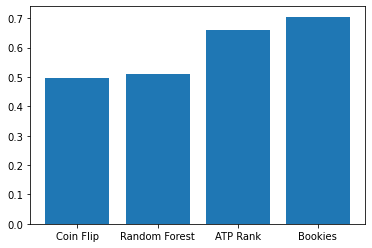

In [503]:
fig, ax = plt.subplots()
types = ['Coin Flip', 'Random Forest', 'ATP Rank', 'Bookies']
results = [0.4963785610, 0.5092129406084, 0.6605772021491984, 0.704883]
ax.bar(types,results)


<BarContainer object of 4 artists>

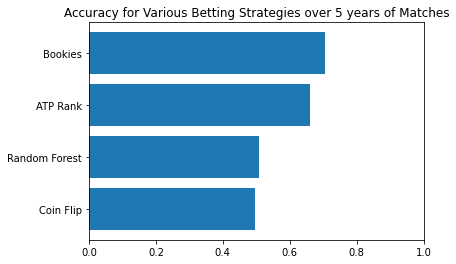

In [514]:
fig, ax = plt.subplots()
types = ['Coin Flip', 'Random Forest', 'ATP Rank', 'Bookies']
results = [0.4963785610, 0.5092129406084, 0.6605772021491984, 0.704883]
ax.set_xlim(0,1)
ax.set_title('Accuracy for Various Betting Strategies over 5 years of Matches')
ax.barh(types, results, align='center')
